In [1]:
import sys
sys.path.append("../") # adding the path to read the utils file
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from utils import *

pd.set_option('display.max_columns', None)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
ds = pd.read_parquet("../datasets/CICIDS2017_improved.parquet")
ds.describe()

,id,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Attempted Category
count,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06,2.099971e+06
mean,2.189099e+05,4.848734e+04,1.249630e+03,1.122764e+01,1.244031e+07,1.252093e+01,1.420796e+01,5.704227e+02,2.191990e+04,2.101727e+02,2.122565e+01,4.977519e+01,6.065612e+01,1.231969e+03,5.345856e+01,4.103030e+02,4.695307e+02,4.660269e+05,1.931849e+04,9.205130e+05,1.708727e+06,4.921730e+06,1.087706e+05,1.237064e+07,2.034979e+06,1.374346e+06,4.890536e+06,1.217609e+06,1.162644e+07,2.075832e+06,1.228668e+06,4.383712e+06,1.258142e+06,1.400077e+00,1.761035e+00,2.990517e-04,9.523941e-07,2.801953e-01,1.415272e-01,1.776759e+02,1.778766e+02,1.400772e+04,5.310767e+03,2.086559e+01,1.269724e+03,2.120223e+02,3.787839e+02,5.819057e+05,6.757098e-01,9.458807e-01,4.228668e-01,3.161113e+00,2.408348e+01,3.000041e-04,4.495300e-04,7.352482e-04,9.100588e-01,2.120223e+02,4.977519e+01,4.103030e+02,7.271781e+01,2.433591e-01,1.847738e+05,4.062824e+03,2.041448e+00,2.501873e+06,2.622131e-02,2.572554e+01,1.571450e-05,1.857193e+02,1.003635e+04,7.539058e+02,2.222695e+00,1.704519e+01,1.266984e+05,5.981879e+04,2.275068e+05,9.240590e+04,4.433527e+06,2.904541e+05,4.677780e+06,4.145354e+06,-9.988581e-01,-9.985924e-01,3.157242e+07,-9.838155e-01
std,1.362580e+05,1.595423e+04,5.820427e+03,5.502013e+00,3.103051e+07,8.703770e+02,1.157986e+03,1.046179e+04,2.627463e+06,4.917835e+02,3.502298e+01,9.170824e+01,1.551064e+02,2.250237e+03,7.415052e+01,6.708353e+02,9.649916e+02,3.977421e+06,1.068626e+05,4.090094e+06,6.058014e+06,1.444160e+07,2.421444e+06,3.100926e+07,9.763692e+06,4.256055e+06,1.444033e+07,9.507334e+06,3.068552e+07,9.7337

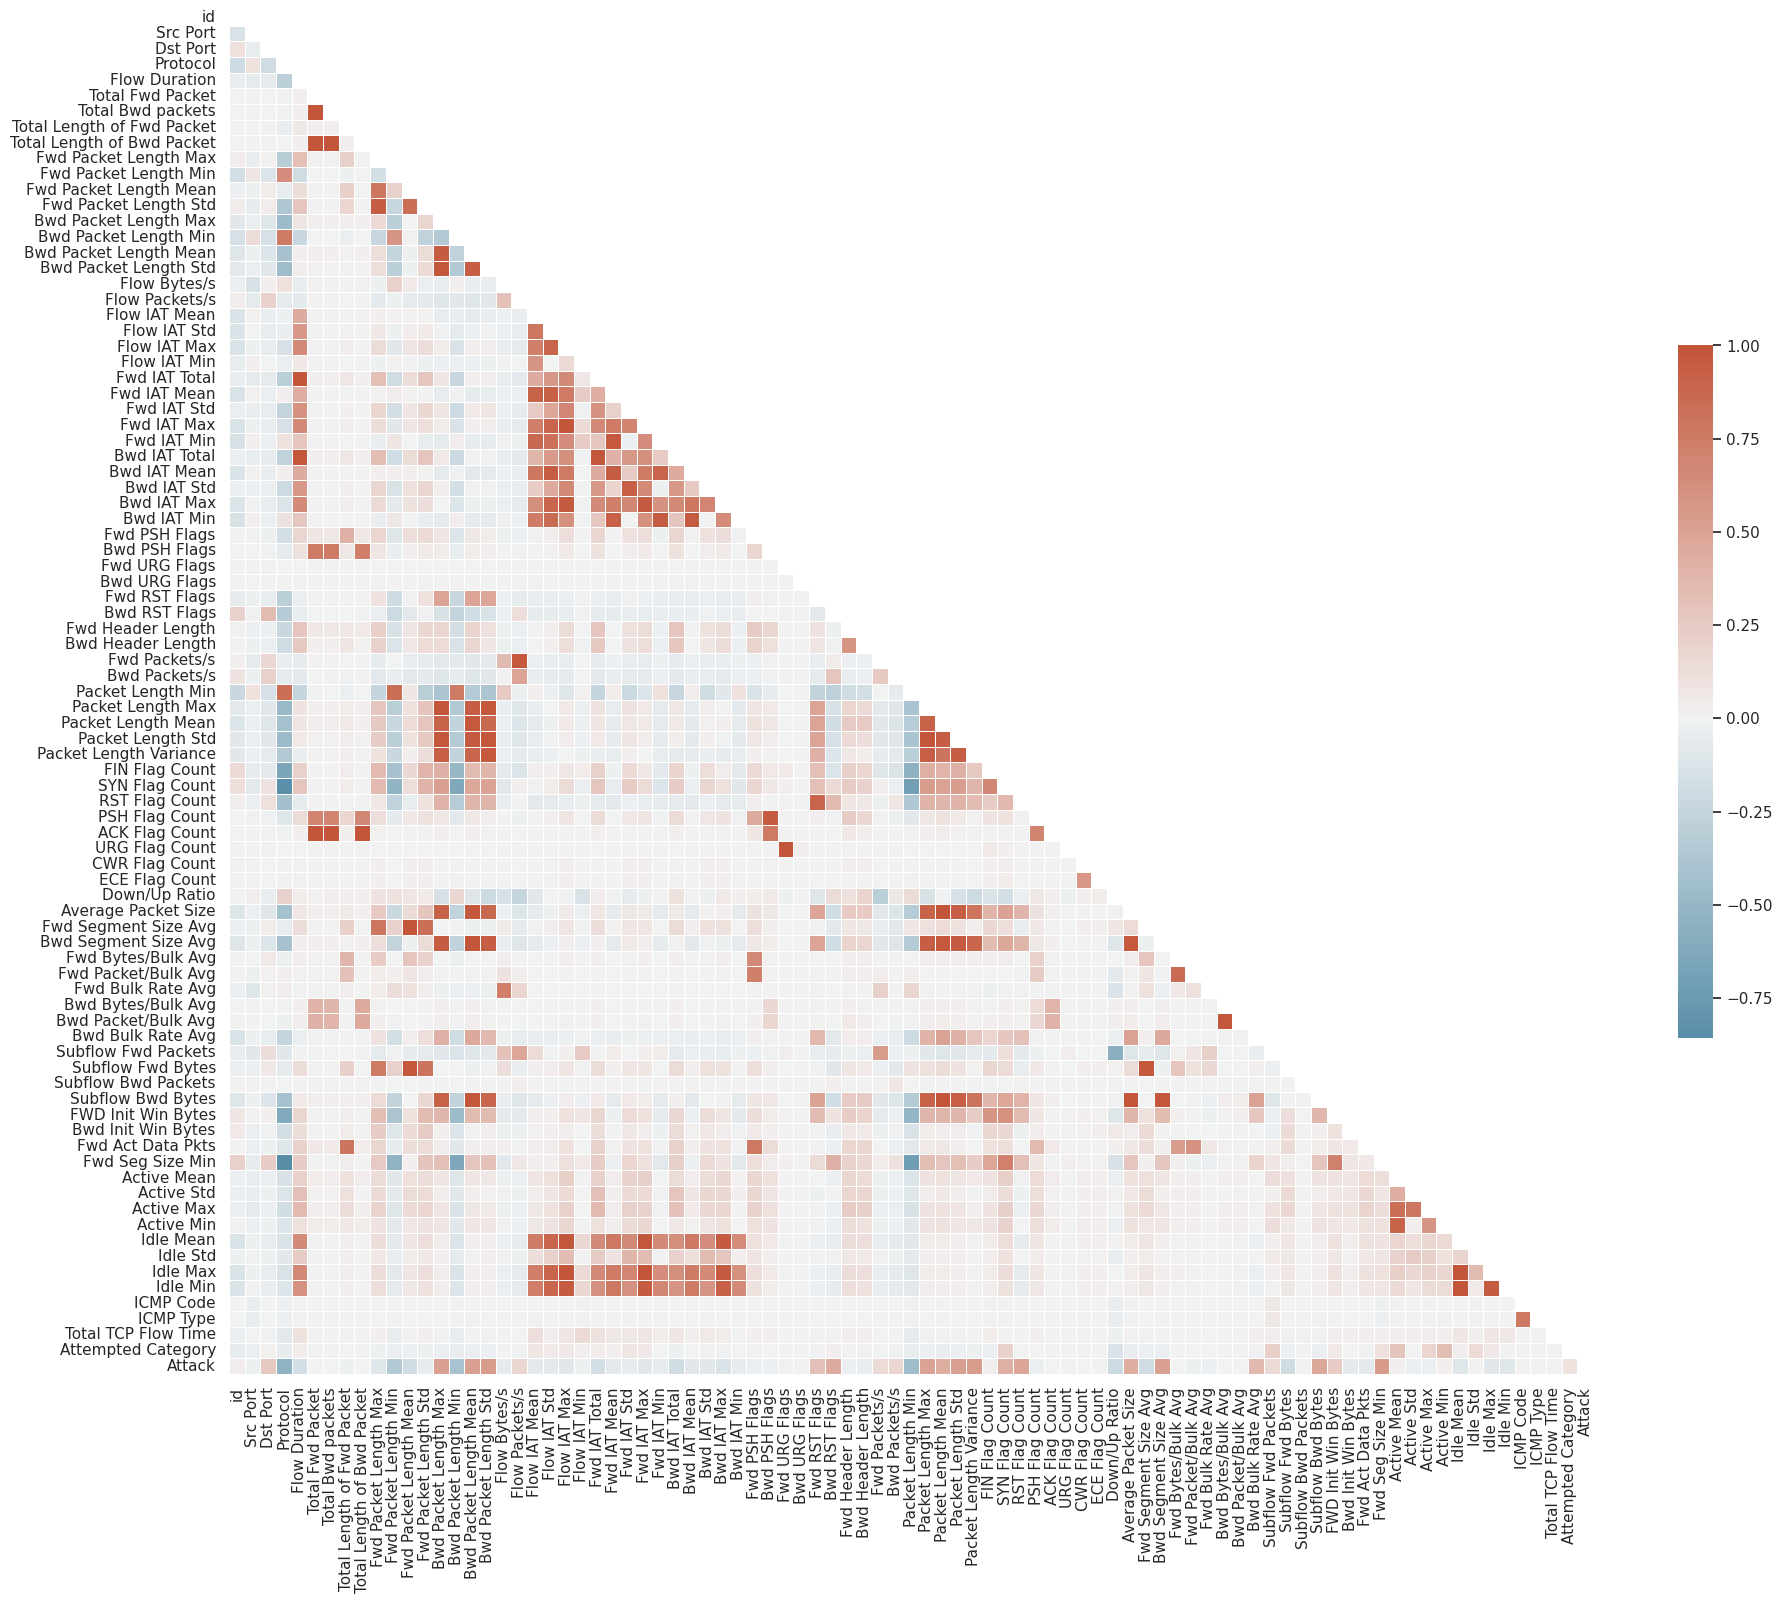

In [3]:
show_corr_matrix(ds)

In [4]:
correlation_matrix = ds.select_dtypes(include=['number','bool']).corr()

In [7]:
# Finding pairs with correlation greater than 0.9
correlation_threshold = 0.9
correlation_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            )
            correlation_pairs.append(pair)

print("Pairs with correlation over 90%:")
for pair in correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Pairs with correlation over 90%:
Flow Duration - Fwd IAT Total: 0.9994591336209862
Flow Duration - Bwd IAT Total: 0.9827956557585235
Total Fwd Packet - Total Bwd packets: 0.9990708124746145
Total Fwd Packet - Total Length of Bwd Packet: 0.996986338938506
Total Fwd Packet - ACK Flag Count: 0.9996853850313235
Total Bwd packets - Total Length of Bwd Packet: 0.9944234088262356
Total Bwd packets - ACK Flag Count: 0.9998248546853827
Total Length of Bwd Packet - ACK Flag Count: 0.9957486598052103
Fwd Packet Length Max - Fwd Packet Length Std: 0.9483176618091684
Fwd Packet Length Mean - Fwd Segment Size Avg: 1.0
Fwd Packet Length Mean - Subflow Fwd Bytes: 0.9747211555769276
Bwd Packet Length Max - Bwd Packet Length Mean: 0.9505367197305999
Bwd Packet Length Max - Bwd Packet Length Std: 0.9835159933855935
Bwd Packet Length Max - Packet Length Max: 0.989391527980833
Bwd Packet Length Max - Packet Length Mean: 0.9081544614789971
Bwd Packet Length Max - Packet Length Std: 0.9834087828406791
Bwd Pa

In [8]:
len(correlation_pairs)

81

In [4]:
scaler = StandardScaler()
scaled_ds = scaler.fit_transform(ds.select_dtypes(include=np.number))

In [5]:
pca = PCA(n_components=2)
pca.fit(scaled_ds)

PCA(n_components=2)

In [6]:
pd.unique(ds['Label'])

array(['BENIGN', 'PortScan', 'Infiltration', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [7]:
brute_force_index =  (ds['Label'] == 'FTP-Patator') | (ds['Label'] == 'SSH-Patator')
brute_force = scaled_ds[brute_force_index]

['FTP-Patator' 'SSH-Patator']


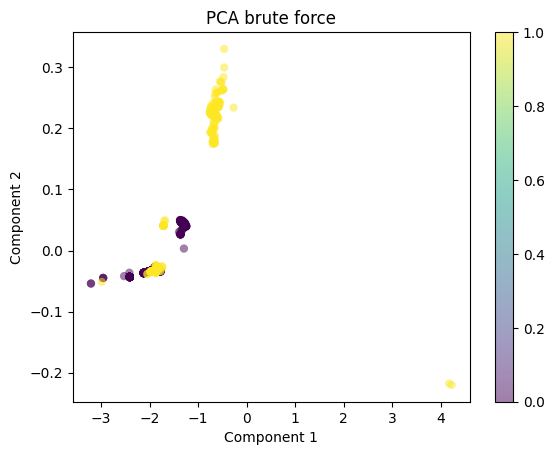

In [57]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[brute_force_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(brute_force)

print(label_encoder.inverse_transform([0,1]))

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA brute force")
plt.colorbar();

In [9]:
web_attack_index = (ds['Label'] == 'Web Attack  Brute Force') | (ds['Label'] == 'Web Attack  XSS') | (ds['Label'] == 'Web Attack  Sql Injection')
web_attack = scaled_ds[web_attack_index]

['Web Attack  Brute Force' 'Web Attack  Sql Injection' 'Web Attack  XSS']


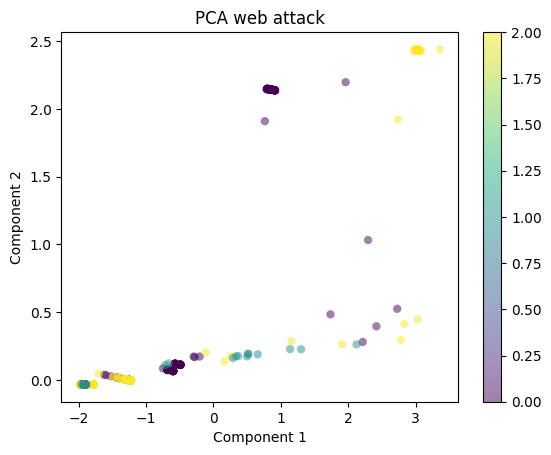

In [58]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[web_attack_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(web_attack)

print(label_encoder.inverse_transform([0,1,2]))


# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA web attack")
plt.colorbar();

In [11]:
pd.unique(ds['Label'])

array(['BENIGN', 'PortScan', 'Infiltration', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [12]:
dos_attack_index = (ds['Label'] == 'DDoS') | (ds['Label'] == 'DoS slowloris') | (ds['Label'] == 'DoS Slowhttptest') | (ds['Label'] == 'DoS Hulk') | (ds['Label'] == 'DoS GoldenEye') | (ds['Label'] == 'Heartbleed')
dos_attack = scaled_ds[dos_attack_index]

['DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest' 'DoS slowloris'
 'Heartbleed']


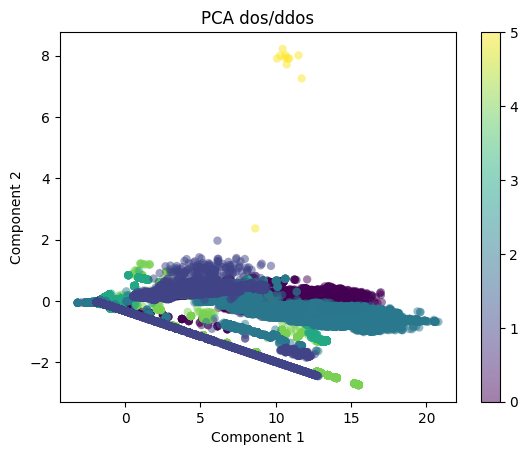

In [53]:
# Assuming 'third_feature' is the categorical feature you want to encode
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(ds[dos_attack_index].Label)

# Let's use PCA to visualize with only two components
ds_pca = pca.transform(dos_attack)

print(label_encoder.inverse_transform([0,1,2,3,4,5]))

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=label, edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA dos/ddos")
plt.colorbar();

In [17]:
#tsne = TSNE(n_components=2, perplexity=50, verbose=1)
#tsne.fit(scaled_ds)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2827677 samples in 1.361s...


In [37]:
attacks = pd.unique(ds['Label']).tolist()
distances = []
attack_names = []

for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            distances.append(distance.euclidean(scaled_ds[ds['Label'] == attack1].mean(0), scaled_ds[ds['Label'] == attack2].mean(0)))
            attack_names.append(attack1 + " - " + attack2)
    attacks.pop(0)

attacks_distances = pd.DataFrame({'attack': attack_names, 'distance': distances})

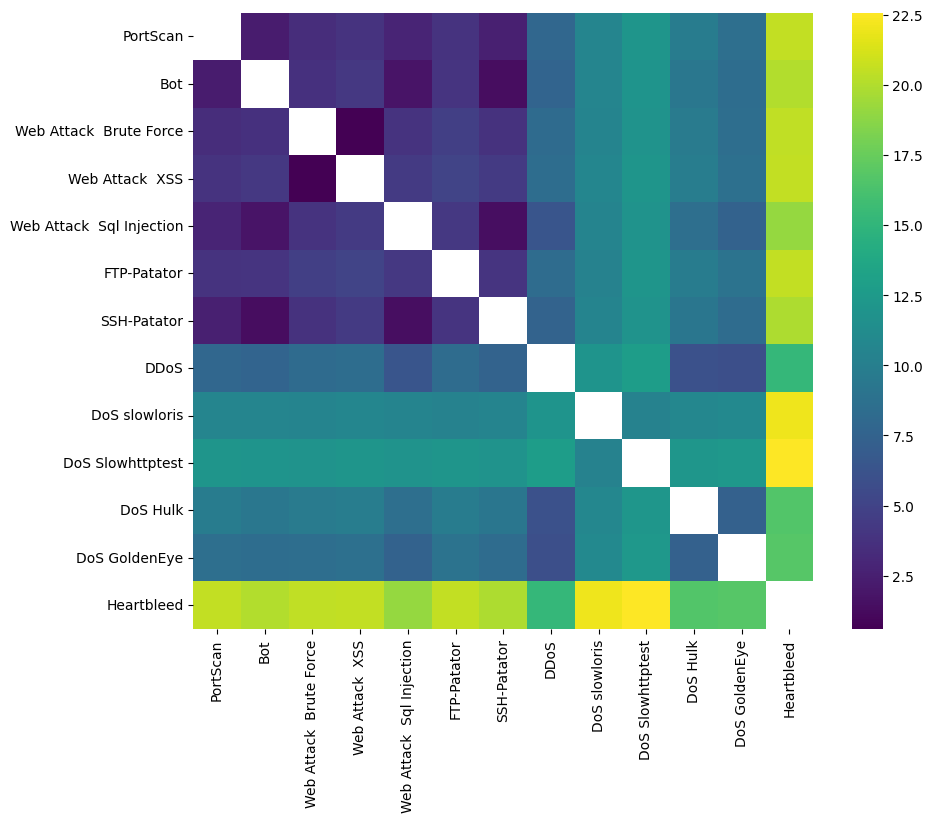

In [49]:
attacks = ['PortScan', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

# Creare un DataFrame vuoto con gli attacchi come indici e colonne
heatmap_data = pd.DataFrame(np.nan, index=attacks, columns=attacks)

# Riempire il DataFrame con le distanze euclidee
for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            mean1 = scaled_ds[ds['Label'] == attack1].mean(0)
            mean2 = scaled_ds[ds['Label'] == attack2].mean(0)
            heatmap_data.loc[attack1, attack2] = distance.euclidean(mean1, mean2)

# Creare la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float), cmap='viridis')
plt.show()

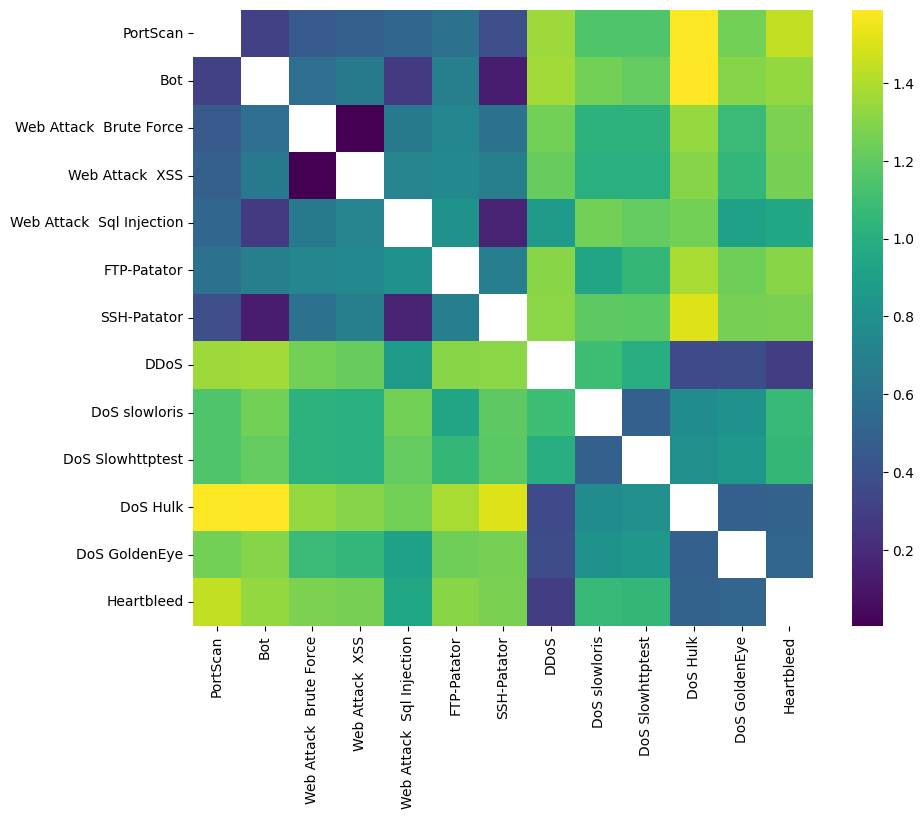

In [50]:
attacks = ['PortScan', 'Bot',
       'Web Attack  Brute Force', 'Web Attack  XSS',
       'Web Attack  Sql Injection', 'FTP-Patator', 'SSH-Patator', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

# Creare un DataFrame vuoto con gli attacchi come indici e colonne
heatmap_data = pd.DataFrame(np.nan, index=attacks, columns=attacks)

# Riempire il DataFrame con le distanze euclidee
for attack1 in attacks:
    for attack2 in attacks:
        if attack1 != attack2:
            mean1 = scaled_ds[ds['Label'] == attack1].mean(0)
            mean2 = scaled_ds[ds['Label'] == attack2].mean(0)
            heatmap_data.loc[attack1, attack2] = distance.cosine(mean1, mean2)

# Creare la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float), cmap='viridis')
plt.show()

In [39]:
attacks_distances.sort_values(by=['distance'], ascending=False)

,attack,distance
26,Infiltration - Heartbleed,55.949285
25,Infiltration - DoS GoldenEye,55.149287
21,Infiltration - DDoS,55.135594
14,Infiltration - PortScan,55.025056
24,Infiltration - DoS Hulk,55.005330
...,...,...
2,BENIGN - Bot,2.245191
39,Web Attack Sql Injection - Bot,1.798014
52,SSH-Patator - Web Attack Sql Injection,1.403928
43,Web Attack Sql Injection - SSH-Patator,1.403928


In [41]:
attacks_distances.sort_values(by=['distance'], ascending=False).to_csv('attacks_distances.csv', index=False)